In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D
from keras.utils import to_categorical
from keras.models import load_model

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
def create_dataset(mnist_img_num, tot_img = 10):
    x_arr = []
    y_arr = []
    for i in range(len(X_test)):
        if(y_train[i] == mnist_img_num[0] or y_train[i] == mnist_img_num[1]):
            x_arr.append(X_train[i])
            y_arr.append(y_train[i])
            tot_img-=1
        if(tot_img == 0):
            break
    return np.asarray(x_arr), np.asarray(y_arr)

# Loading Model

### Note: Initially the model was trained on 1 and 2

In [4]:
model_l = load_model('partially_trained.h5')

# Re-Training with 0 and 2 digits

In [5]:
x, y = create_dataset([0, 2], 500)
y = to_categorical(y)
x = x.reshape((len(y), 28, 28, 1))
print(x.shape)

(500, 28, 28, 1)


In [6]:
y[:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [7]:
# model_l.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# for _ in range(10):
#     history_2 = model_l.train_on_batch(x,y)
    
history_2 = model_l.fit(x, y, epochs=50, verbose=0)

In [9]:
history_2

## Prediction for 0

In [11]:
testx, testy = create_dataset([0 , 0], 5)
print('Test Y: ', testy)
testx = testx.reshape((len(testy), 28, 28, 1))
print(testx.shape)
# test = np.expand_dims(testx, axis=0)
predicted = model_l.predict(testx)
for i in predicted:
    print('predicted: ', np.argmax(i))
print('actual: ',testy[0])

Test Y:  [0 0 0 0 0]
(5, 28, 28, 1)
predicted:  0
predicted:  0
predicted:  0
predicted:  0
predicted:  0
actual:  0


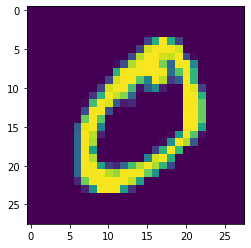

In [12]:
plt.imshow(testx[0].reshape((28,28)))
# plt.suptitle(y[i])
plt.show()

## Prediction for 1

In [13]:
testx, testy = create_dataset([1 , 1], 5)
print('Test Y: ', testy)
testx = testx.reshape((len(testy), 28, 28, 1))
print(testx.shape)
# test = np.expand_dims(testx, axis=0)
predicted = model_l.predict(testx)
for i in predicted:
    print('predicted: ', np.argmax(i))
print('actual: ',testy[0])

Test Y:  [1 1 1 1 1]
(5, 28, 28, 1)
predicted:  1
predicted:  1
predicted:  1
predicted:  2
predicted:  2
actual:  1


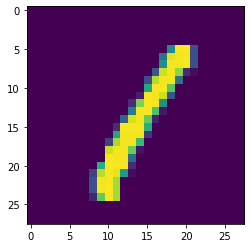

In [14]:
plt.imshow(testx[0].reshape((28,28)))
# plt.suptitle(y[i])
plt.show()

## Prediction for 2

In [15]:
testx, testy = create_dataset([2 , 2], 5)
print('Test Y: ', testy)
testx = testx.reshape((len(testy), 28, 28, 1))
print(testx.shape)
# test = np.expand_dims(testx, axis=0)
predicted = model_l.predict(testx)
for i in predicted:
    print('predicted: ', np.argmax(i))
print('actual: ',testy[0])

Test Y:  [2 2 2 2 2]
(5, 28, 28, 1)
predicted:  2
predicted:  2
predicted:  2
predicted:  2
predicted:  2
actual:  2


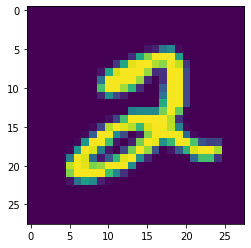

In [16]:
plt.imshow(testx[0].reshape((28,28)))
plt.show()